<a href="https://colab.research.google.com/github/newguy7/DataScienceBootCamp/blob/main/Assignments/Boston_house_prediction_NeuralRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 1) handle nan values
# 2) remove outliers
# 3) one hot encoding if needed
# 4) train test split
# 5) use neural networks to predict the column "MEDV"

import pandas as pd

data = pd.read_csv('HousingData.csv')

data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [2]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [4]:
# check for missing values
data.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [5]:
# Check the data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [6]:
# Drop irrelevant column
data = data.drop(['AGE'],axis=1)

In [7]:
# fill the nan values
from sklearn.impute import SimpleImputer
import numpy as np
# fill the rows with NA value
num_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

# For Numerical Columns
num_col = data.loc[:,data.dtypes!=object].columns
num_mean.fit(data[num_col])

data[num_col] = num_mean.transform(data[num_col])

data.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [8]:
# Splitting Features and Label

# Label Data
Y = data['MEDV']

# Features Data
X = data.drop(['MEDV'],axis=1)
features_cols = X.columns

In [9]:
# Data Preprocessing (Scaling)

from sklearn.preprocessing import StandardScaler

X_values = X[features_cols].values
scaler = StandardScaler()
scaler.fit(X_values)
print(scaler.mean_)

X_values = scaler.transform(X_values)

# Assigning the values back to their column name
X = pd.DataFrame(data=X_values, columns=features_cols)

[3.61187397e+00 1.12119342e+01 1.10839918e+01 6.99588477e-02
 5.54695059e-01 6.28463439e+00 3.79504269e+00 9.54940711e+00
 4.08237154e+02 1.84555336e+01 3.56674032e+02 1.27154321e+01]


In [10]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=.2)

In [11]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,DIS,RAD,TAX,PTRATIO,B,LSTAT
373,0.878054,-0.489639,1.048332e+00,-0.279851,0.978765,-1.964083,-1.245868,1.661245,1.530926,0.806576,0.441052,3.148042
368,0.150673,-0.489639,1.048332e+00,-0.279851,0.659147,-1.872905,-1.170617,1.661245,1.530926,0.806576,0.206634,-1.349657
469,1.108454,-0.489639,1.048332e+00,-0.279851,0.218592,-0.814384,-0.461746,1.661245,1.530926,0.806576,0.441052,0.291839
195,-0.421451,3.004057,-1.587438e+00,-0.279851,-1.146264,2.265728,0.881029,-0.637962,-0.910119,-1.875127,0.411777,-1.391051
474,0.520528,-0.489639,1.048332e+00,-0.279851,0.253146,-1.221836,-0.648994,1.661245,1.530926,0.806576,-0.044888,0.774296
...,...,...,...,...,...,...,...,...,...,...,...,...
434,1.206646,-0.489639,1.048332e+00,-0.279851,1.367490,-0.109178,-0.747681,1.661245,1.530926,0.806576,-2.807359,0.350362
147,-0.145626,-0.489639,-2.654233e-16,-0.279851,2.732346,-1.935590,-1.109627,-0.523001,-0.031105,-1.736418,0.384147,2.400090
415,1.695230,-0.489639,1.048332e+00,-0.279851,1.073787,0.212795,-0.931886,1.661245,1.530926,0.806576,-3.611923,2.331576
218,-0.410103,-0.489639,4.192739e-01,3.720376,-0.040557,-0.475315,-0.430562,-0.523001,-0.785394,-0.950402,0.441052,0.742894


In [12]:
# Implementing Neural Network
model = Sequential()

# Input Layer with input size 12
model.add(Dense(32,input_shape=(12,),activation='relu'))

# Hidden Layer
model.add(Dense(16,activation='relu'))
model.add(Dense(8,activation='relu'))

# Output Layer
model.add(Dense(1,activation='linear'))

In [13]:
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(X_train.values,y_train.values,epochs=150,batch_size=10)

Epoch 1/150
41/41 [==============================] - 3s 7ms/step - loss: 570.1393
Epoch 2/150
41/41 [==============================] - 0s 5ms/step - loss: 491.7723
Epoch 3/150
41/41 [==============================] - 0s 4ms/step - loss: 275.8587
Epoch 4/150
41/41 [==============================] - 0s 6ms/step - loss: 80.6817
Epoch 5/150
41/41 [==============================] - 0s 4ms/step - loss: 46.7609
Epoch 6/150
41/41 [==============================] - 0s 4ms/step - loss: 35.9594
Epoch 7/150
41/41 [==============================] - 0s 6ms/step - loss: 29.8904
Epoch 8/150
41/41 [==============================] - 0s 4ms/step - loss: 26.5448
Epoch 9/150
41/41 [==============================] - 0s 4ms/step - loss: 23.8594
Epoch 10/150
41/41 [==============================] - 0s 3ms/step - loss: 22.5292
Epoch 11/150
41/41 [==============================] - 0s 6ms/step - loss: 20.8424
Epoch 12/150
41/41 [==============================] - 0s 8ms/step - loss: 19.8001
Epoch 13/150
41/41 [==

In [14]:
predicted_lbls = model.predict(X_test.values)

4/4 [==============================] - 0s 3ms/step


In [15]:
predicted_lbls

array([[21.674541 ],
       [17.789837 ],
       [49.45422  ],
       [21.171793 ],
       [25.356094 ],
       [24.9334   ],
       [26.264149 ],
       [15.546584 ],
       [22.345882 ],
       [41.53138  ],
       [12.674542 ],
       [14.430814 ],
       [26.150124 ],
       [25.796993 ],
       [38.238354 ],
       [12.956134 ],
       [39.207336 ],
       [20.812113 ],
       [17.300047 ],
       [29.921444 ],
       [14.469321 ],
       [16.95185  ],
       [15.325137 ],
       [16.254892 ],
       [16.985828 ],
       [ 8.297604 ],
       [28.787556 ],
       [34.61461  ],
       [25.23677  ],
       [12.173756 ],
       [16.095049 ],
       [17.574379 ],
       [23.607224 ],
       [18.625582 ],
       [35.58149  ],
       [15.556778 ],
       [37.01857  ],
       [22.336178 ],
       [20.21809  ],
       [20.834248 ],
       [17.631348 ],
       [19.55233  ],
       [20.600674 ],
       [22.173111 ],
       [21.007765 ],
       [15.281762 ],
       [24.885082 ],
       [13.38

In [16]:
X_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,DIS,RAD,TAX,PTRATIO,B,LSTAT
393,-5.201739e-17,-4.896385e-01,1.048332e+00,-0.279851,1.194724,-0.130548,-0.952565,1.661245,1.530926,0.806576,0.441052,0.350362
315,-3.933686e-01,-4.896385e-01,-1.769121e-01,-0.279851,-0.092387,-0.825781,0.071285,-0.637962,-0.619094,-0.025677,0.435789,-0.173489
262,-5.201739e-17,3.837853e-01,-1.062973e+00,-0.279851,0.797361,3.010825,-0.716164,-0.523001,-0.856665,-2.522434,0.330970,-0.971399
120,-4.149878e-01,-4.896385e-01,2.176454e+00,-0.279851,0.227231,-0.590712,-0.730805,-0.867883,-1.308051,0.297977,0.356078,0.236171
0,-4.223285e-01,2.964429e-01,-1.311010e+00,-0.279851,-0.144217,0.413672,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.104146
...,...,...,...,...,...,...,...,...,...,...,...,...
431,7.555562e-01,-4.896385e-01,1.048332e+00,-0.279851,0.253146,0.781234,-0.811380,1.661245,1.530926,0.806576,-3.018971,0.995541
111,-4.112571e-01,-4.896385e-01,-1.604759e-01,-0.279851,-0.066472,0.613124,-0.531245,-0.408041,0.141134,-0.303094,0.426689,-0.364759
167,-2.121970e-01,-7.757562e-17,1.269474e+00,-0.279851,0.434551,-0.580740,-0.650848,-0.523001,-0.031105,-1.736418,-1.415104,-0.082136
123,-4.054543e-01,-4.896385e-01,-2.654233e-16,-0.279851,0.227231,-0.610658,-0.879738,-0.867883,-1.308051,0.297977,0.149510,1.812007


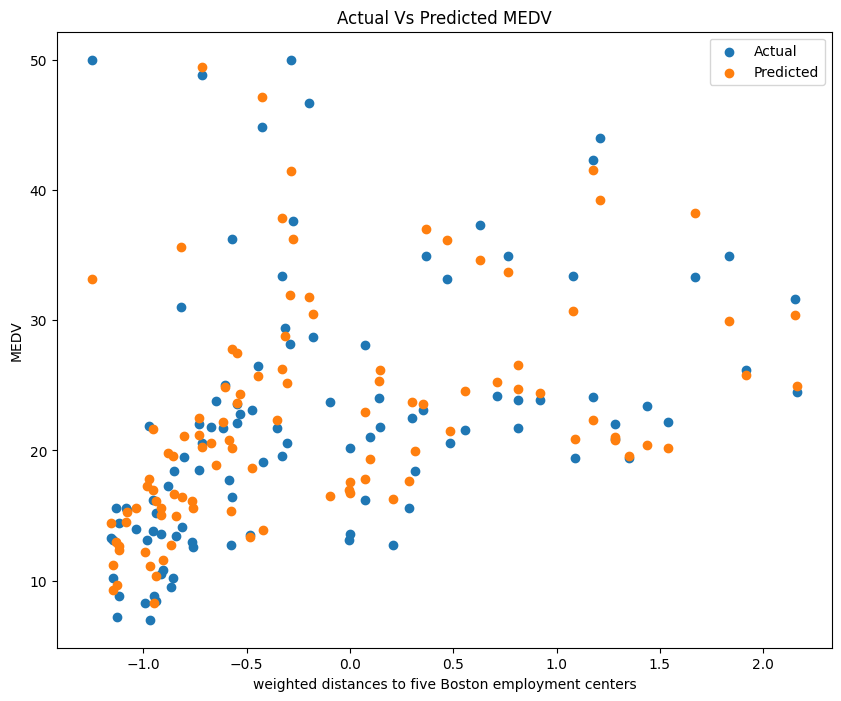

In [26]:
# Visuzlization
# Actual Labels vs Predicted Labels
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.scatter(X_test.DIS,y_test,label="Actual")
plt.scatter(X_test.DIS,predicted_lbls,label="Predicted")

plt.xlabel('weighted distances to five Boston employment centers')
plt.ylabel("MEDV")
plt.title("Actual Vs Predicted MEDV")
plt.legend()
plt.show()

In [18]:
# Model Evaluation
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score

# r2_score
print(f"r2_score: {r2_score(y_test,predicted_lbls)}")

# mean squared error
print(f"mean squared error: {mean_squared_error(y_test,predicted_lbls)}")

# root mean squared error
print(f"root mean squared error: {np.sqrt(mean_squared_error(y_test,predicted_lbls))}")

# mean absolute error
print(f"mean absolute error: {mean_absolute_error(y_test,predicted_lbls)}")

# explained variance score
print(f"explained variance score: {explained_variance_score(y_test,predicted_lbls)}")

r2_score: 0.8413311257422625
mean squared error: 15.441958027809171
root mean squared error: 3.9296256854577347
mean absolute error: 2.85572114458271
explained variance score: 0.8426255054901219
